✅ DQN: 데이터 로드 및 이동 평균 적용 완료. (총 3000 에피소드)
❌ 오류: ./scores/Double_DQN_scores.npy 파일을 찾을 수 없습니다. 이 알고리즘은 건너뜁니다.
❌ 오류: ./scores/Dueling_DQN_scores.npy 파일을 찾을 수 없습니다. 이 알고리즘은 건너뜁니다.
❌ 오류: ./scores/PPO_scores.npy 파일을 찾을 수 없습니다. 이 알고리즘은 건너뜁니다.
❌ 오류: ./scores/A2C_scores.npy 파일을 찾을 수 없습니다. 이 알고리즘은 건너뜁니다.


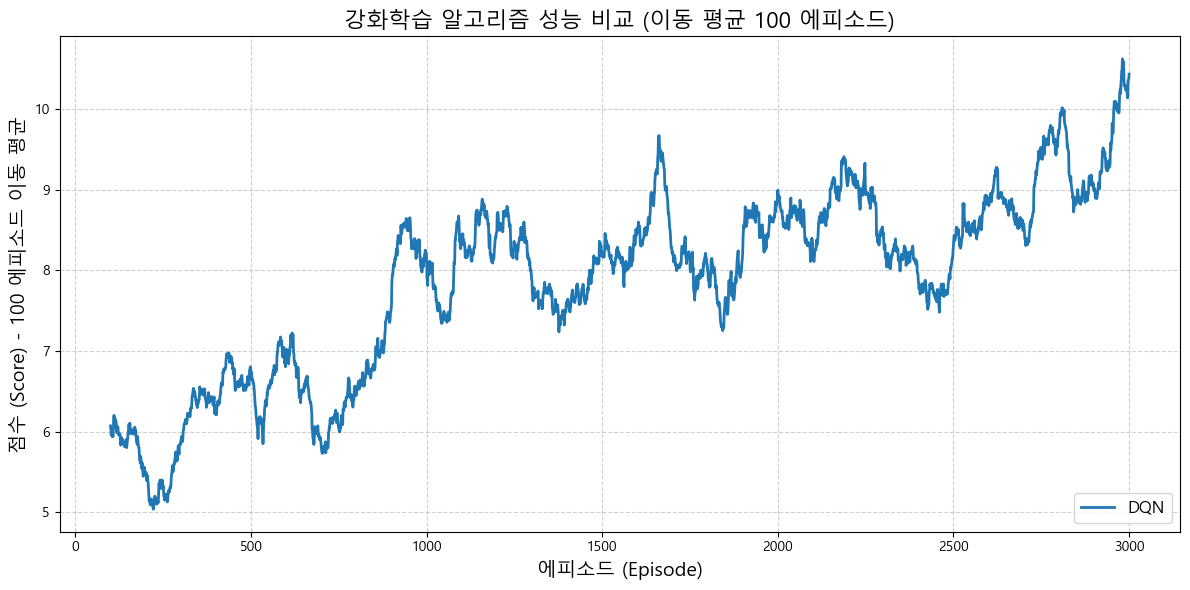

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 설정 변수 ---
ALGORITHMS = ["DQN", "Double_DQN", "Dueling_DQN", "PPO", "A2C"]
WINDOW_SIZE = 100  # 이동 평균을 계산할 윈도우 크기 (객관성 있는 추세 파악을 위해 중요)
FIG_SIZE = (12, 6)

    
def moving_average(data, window):
    """데이터에 이동 평균을 적용하여 평활화합니다."""
    if len(data) < window:
        # 데이터가 윈도우 크기보다 작으면 원본 반환
        return data
    
    # convolution을 이용한 효율적인 이동 평균 계산
    weights = np.ones(window) / window
    smoothed_data = np.convolve(data, weights, 'valid')
    
    # 시작점 맞추기: valid 모드는 윈도우 크기만큼 길이가 줄어들므로, 
    # 시작 부분을 채우거나 (간단히) 뒤쪽부터 플롯합니다.
    return smoothed_data

loaded_score = []
def load_and_plot_scores(algorithms, window_size, fig_size):
    """
    각 알고리즘의 scores.npy 파일을 불러와 학습 곡선 그래프를 생성합니다.
    """
    plt.figure(figsize=fig_size)
    plt.title(f"강화학습 알고리즘 성능 비교 (이동 평균 {window_size} 에피소드)", fontsize=16)
    plt.xlabel("에피소드 (Episode)", fontsize=14)
    plt.ylabel(f"점수 (Score) - {window_size} 에피소드 이동 평균", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    for algo in algorithms:
        file_name = f"./scores/{algo}_scores.npy"
        
        try:
            # 1. 점수 데이터 불러오기
            scores = np.load(file_name)
            loaded_score.append(scores)
            smoothed_scores = moving_average(scores, window_size)
            
            # 3. 그래프에 추가
            # 이동 평균이 적용된 후의 길이에 맞춰 X축 생성
            x_axis = np.arange(len(smoothed_scores)) + window_size
            
            plt.plot(x_axis, smoothed_scores, label=f"{algo}", linewidth=2)
            
            print(f"✅ {algo}: 데이터 로드 및 이동 평균 적용 완료. (총 {len(scores)} 에피소드)")

        except FileNotFoundError:
            print(f"❌ 오류: {file_name} 파일을 찾을 수 없습니다. 이 알고리즘은 건너뜁니다.")
        except Exception as e:
            print(f"❌ 오류 발생 중 {algo}: {e}")

    # 4. 그래프 설정 마무리
    plt.legend(loc="lower right", fontsize=12)
    plt.tight_layout()
    plt.show()

# --- 함수 실행 ---
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
load_and_plot_scores(ALGORITHMS, WINDOW_SIZE, FIG_SIZE)